In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
dates_to_visualize = [
    "2019-02",
    "2020-02",
    "2021-02",
    "2022-02",
    "2023-02",
    # "2024-02",
]

In [5]:
available_data_files = list(Path("../data/httparchive_metrics/nel_deployment").glob("*.parquet"))

used_data_files = list(filter(lambda file: file.stem in dates_to_visualize, available_data_files))
used_data_files

[WindowsPath('../data/httparchive_metrics/nel_deployment/2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2020-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2021-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2022-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_deployment/2023-02.parquet')]

### Aggregate result to visualize

In [6]:
from results.result_utils import date_to_text_format, concat_data_from_files

result = concat_data_from_files(used_data_files)
        
result['total_crawled_domains'] = np.floor(pd.to_numeric(result['total_crawled_domains'], errors='coerce')).astype('UInt32')
result['total_crawled_domains_with_nel'] = np.floor(pd.to_numeric(result['total_crawled_domains_with_nel'], errors='coerce')).astype('UInt32')
result['total_crawled_domains_with_correct_nel'] = np.floor(pd.to_numeric(result['total_crawled_domains_with_correct_nel'], errors='coerce')).astype('UInt32')
        
result['total_crawled_resources'] = np.floor(pd.to_numeric(result['total_crawled_resources'], errors='coerce')).astype('UInt32') 
result['total_crawled_resources_with_nel'] = np.floor(pd.to_numeric(result['total_crawled_resources_with_nel'], errors='coerce')).astype('UInt32') 
result['total_crawled_resources_with_correct_nel'] = np.floor(pd.to_numeric(result['total_crawled_resources_with_correct_nel'], errors='coerce')).astype('UInt32')
        
result['date'] = result['date'].map(date_to_text_format)
result["nel_percentage"] = \
        np.uint32(result['total_crawled_domains_with_correct_nel']) / np.uint32(result['total_crawled_domains']) * 100

result

,date,total_crawled_resources,total_crawled_domains,total_crawled_resources_with_nel,total_crawled_domains_with_nel,total_crawled_resources_with_correct_nel,total_crawled_domains_with_correct_nel,nel_percentage
0,Feb 2019,351105672,5707189,2592,382,2532,370,0.01
0,Feb 2020,426587287,6636205,589195,109644,588014,109604,1.65
0,Feb 2021,607075754,10147089,51156475,1008393,51150134,1008105,9.93
0,Feb 2022,622531991,10363447,58326227,973629,58267984,972168,9.38
0,Feb 2023,1174213534,19159612,109848257,2260772,109748008,2258979,11.79


### DOMAINS queried within each month and those responding with valid NEL headers

In [7]:
result[['date', 'total_crawled_domains', 'total_crawled_domains_with_correct_nel', 'nel_percentage']]

,date,total_crawled_domains,total_crawled_domains_with_correct_nel,nel_percentage
0,Feb 2019,5707189,370,0.01
0,Feb 2020,6636205,109604,1.65
0,Feb 2021,10147089,1008105,9.93
0,Feb 2022,10363447,972168,9.38
0,Feb 2023,19159612,2258979,11.79


<Axes: xlabel='date', ylabel='total_crawled_domains_with_correct_nel'>

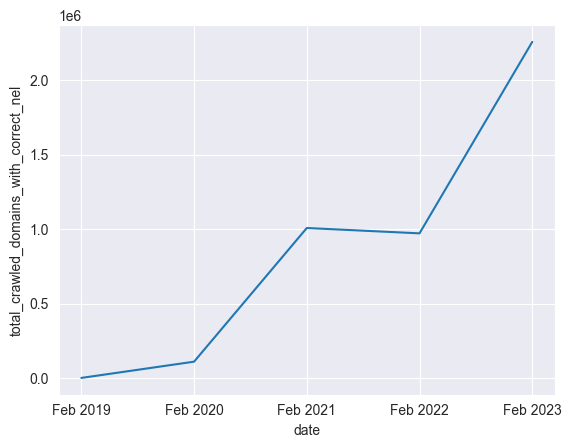

In [12]:
sns.lineplot(result, x='date', y='total_crawled_domains_with_correct_nel')

### RESOURCES queried within each month and those with valid NEL headers

In [9]:
result['nel_resource_percentage'] = result['total_crawled_resources_with_correct_nel'] / result['total_crawled_resources'] * 100
result[['date', 'total_crawled_resources', 'total_crawled_resources_with_correct_nel', 'nel_resource_percentage']]

,date,total_crawled_resources,total_crawled_resources_with_correct_nel,nel_resource_percentage
0,Feb 2019,351105672,2532,0.00
0,Feb 2020,426587287,588014,0.14
0,Feb 2021,607075754,51150134,8.43
0,Feb 2022,622531991,58267984,9.36
0,Feb 2023,1174213534,109748008,9.35


### Incorrect NEL deployment

In [10]:
result['domains_with_incorrect_nel'] = result['total_crawled_domains_with_nel'] - result['total_crawled_domains_with_correct_nel']
result['resources_with_incorrect_nel'] = result['total_crawled_resources_with_nel'] - result['total_crawled_resources_with_correct_nel']

result[['date', 'domains_with_incorrect_nel', 'resources_with_incorrect_nel']]

,date,domains_with_incorrect_nel,resources_with_incorrect_nel
0,Feb 2019,12,60
0,Feb 2020,40,1181
0,Feb 2021,288,6341
0,Feb 2022,1461,58243
0,Feb 2023,1793,100249
